<a href="https://colab.research.google.com/github/SteveWong-a/COSMOS-ratplacecelldata/blob/main/speed_velocity_ratprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
This Colab script loads the processed 'COSMOSdata.npz' file from Google Drive,
which contains several NumPy arrays. It then loads each array into a separate
variable and prints a summary of the loaded data.
"""

# Import necessary libraries
import numpy as np
from google.colab import drive

# --- Main Execution ---

# 1. Mount Google Drive
# This will prompt you for authorization if not already mounted.
drive.mount('/content/drive')

# 2. Define file path
# This should be the same path where the previous script saved the file.
# input_file = '/content/drive/MyDrive/COSMOS_010perfect.npz'

input_file='/content/drive/MyDrive/COSMOS_010reverse.npz'

# Load the .npz file.
# np.load() returns a lazy-loader object that acts like a dictionary.
print(f"Loading data from: {input_file}")
try:
    data = np.load(input_file)

    print("\n--- Loading variables into memory ---")
    # You can access each array like a dictionary key
    timestamps = data['timestamps']
    calcium_signal = data['calcium_signal']
    coordinates = data['coordinates']
    head_orientation = data['head_orientation']
    dirbin = data['dirbin']
    ttype = data['ttype']
    start = data['start']
    dirvec = data['dirvec']
    posvec = data['posvec']
    epoch_data = data['epoch']
    tnum = data['tnum']


    # Correctly transpose calcium_signal to have shape (18200, 881)
    calcium_signal = calcium_signal.T
    epoch_data = epoch_data.T
    print("All arrays loaded successfully.")

    # Print the shape of each loaded array to verify
    print("\n--- Summary of Loaded Variables ---")
    print(f"timestamps: {timestamps.shape}")
    print(f"calcium_signal: {calcium_signal.shape}")
    print(f"coordinates: {coordinates.shape}")
    print(f"head_orientation: {head_orientation.shape}")
    print(f"dirbin: {dirbin.shape}")
    print(f"ttype: {ttype.shape}")
    print(f"start: {start.shape}")
    print(f"dirvec: {dirvec.shape}")
    print(f"posvec: {posvec.shape}")
    print(f"epoch_data: {epoch_data.shape}")
    print(f"tnum: {tnum.shape}")

    # You can now use these variables for analysis.
    # For example, print the first 5 timestamps:
    print("\nExample usage - first 5 timestamps:")
    print(timestamps[:5])

except FileNotFoundError:
    print(f"Error: The file was not found at {input_file}")
    print("Please ensure the file path is correct and the file exists in your Drive.")
except KeyError as e:
    print(f"Error: A required array was not found in the .npz file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Mounted at /content/drive
Loading data from: /content/drive/MyDrive/COSMOS_010reverse.npz

--- Loading variables into memory ---
All arrays loaded successfully.

--- Summary of Loaded Variables ---
timestamps: (1, 45100)
calcium_signal: (148, 45100)
coordinates: (45100, 2)
head_orientation: (1, 45100)
dirbin: (45100,)
ttype: (1, 45100)
start: (45100,)
dirvec: (45100, 8)
posvec: (45100, 3)
epoch_data: (45100,)
tnum: (45100,)

Example usage - first 5 timestamps:
[[2.53341705e+01 1.26668620e+02 2.27836394e+02 ... 4.62726434e+06
  4.62736534e+06 4.62746668e+06]]


In [ ]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the .npz file
data = np.load('/content/drive/MyDrive/COSMOS_010perfect.npz')

# Get a list of all variables (arrays) in the .npz file
variables = data.keys()
print("Variables in the .npz file:")
for var in variables:
    df = pd.DataFrame(data[var])
    if(var in ['posvec', 'calcium_signal', 'coordinates', 'dirbin', 'start', 'dirvec', 'tnum', 'epoch']):
        df = df.T
    print(f"{var}: {df.shape} original shape {data[var].shape}")
    display(df.head())

Variables in the .npz file:
timestamps: (1, 18001) original shape (1, 18001)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,25.333333,126.583333,227.666667,329.0,430.166667,531.333333,632.666667,733.75,835.0,936.333333,...,1848079.0,1.848180e+06,1.848281e+06,1.848383e+06,1848484.0,1848585.0,1.848686e+06,1848787.5,1.848889e+06,1848990.0


calcium_signal: (738, 18001) original shape (18001, 738)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0.936812,1.000000,0.936916,0.920996,0.862896,0.925475,0.867092,0.854534,0.814752,0.763354,...,4.219796e-02,3.953593e-02,1.818807e-01,1.915468e-01,1.794633e-01,1.681420e-01,1.575349e-01,1.475969e-01,1.382859e-01,1.295622e-01
1,0.250361,0.229346,0.210096,0.199400,0.182663,0.167331,0.207219,0.189826,0.173893,0.159297,...,1.126727e-05,1.032205e-05,9.455182e-06,8.661712e-06,7.934696e-06,7.269173e-06,6.658201e-06,6.099797e-06,5.588009e-06,5.118870e-06
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.423224e-06,1.300145e-06,1.187811e-06,1.085245e-06,9.914703e-07,9.064871e-07,8.283417e-07,7.570339e-07,6.915871e-07,6.320012e-07
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.510184e-08,2.384675e-08,2.133656e-08,2.008147e-08,1.882638e-08,1.757129e-08,1.631620e-08,1.506110e-08,1.380601e-08,1.380601e-08
4,0.000000,0.000000,0.000000,0.000000,0.057030,0.129721,0.117766,0.106914,0.097062,0.088117,...,3.944513e-07,3.581019e-07,3.251020e-07,2.951432e-07,2.679452e-07,2.432535e-07,2.208372e-07,2.004866e-07,2.125557e-03,1.929683e-03


coordinates: (2, 18001) original shape (18001, 2)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,228.356760,228.274849,228.593891,228.469172,228.847650,232.533357,237.652449,242.015805,252.118131,263.643250,...,220.757572,220.871879,220.709886,220.702787,220.889678,222.932350,226.014372,233.343327,243.343145,258.174554
1,239.804937,240.252036,240.318235,240.412322,240.190112,240.337048,240.823168,240.905461,241.926803,244.602411,...,456.179268,456.168383,452.983322,454.892554,453.648164,453.898602,453.909852,456.150789,452.952406,452.674372


head_orientation: (1, 18001) original shape (1, 18001)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,-0.303738,-0.506209,-0.708497,-0.911291,-1.113748,-1.196739,-1.16416,-0.923792,-0.586423,-0.276872,...,1.422047,1.420469,1.290783,0.946294,0.542091,0.213412,0.003011,-0.178645,0.042297,0.003113


dirbin: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,1,8,8,8,8,7,8,8,8,1,...,3,3,3,2,2,1,1,1,1,1


ttype: (1, 18001) original shape (1, 18001)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


start: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dirvec: (8, 18001) original shape (18001, 8)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


tnum: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


epoch: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


posvec: (3, 18001) original shape (18001, 3)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ===================================================================
# CREATE A NEW VARIABLE WITH SPEED/VELOCITY (CORRECTED)
# ===================================================================
import pandas as pd
from IPython.display import display
import numpy as np

print("--- Calculating Speed/Velocity and Angular Velocity ---")

# Define the file path
input_file = '/content/drive/MyDrive/COSMOS_010perfect.npz'
data = np.load(input_file)

# Extract and prepare variables
timestamps = np.squeeze(data['timestamps'])
xy_coordinates = data['coordinates']
head_orientation_2d = data['head_orientation'] # Keep original shape for now

# --- VALIDATION STEP ---
if timestamps.shape[0] != xy_coordinates.shape[0]:
    print("\n\033[91mError: Mismatch in data length!\033[0m")
    print(f"The number of timestamps ({timestamps.shape[0]}) does not match the number of position entries ({xy_coordinates.shape[0]}).")
else:
    # --- Calculate Linear Velocity and Speed ---
    delta_position = np.diff(xy_coordinates, axis=0)
    delta_time = np.diff(timestamps)
    velocity = delta_position / delta_time[:, np.newaxis]
    speed = np.linalg.norm(velocity, axis=1)

    # --- Calculate Angular Velocity (Corrected) ---
    # 1. Squeeze head_orientation to a 1D array (e.g., from (1, 18001) to (18001,))
    head_orientation_1d = np.squeeze(head_orientation_2d)

    # 2. Calculate the difference along the 1D array
    delta_theta = np.diff(head_orientation_1d)

    # 3. Correct for angle wrap-around
    delta_theta_corrected = (delta_theta + np.pi) % (2 * np.pi) - np.pi

    # 4. Calculate angular velocity. Shapes now match: (18000,) / (18000,)
    angular_velocity = delta_theta_corrected / delta_time

    # --- Create the new DataFrame ---
    # All calculated arrays (speed, velocity, angular_velocity) have length N-1
    motion_df = pd.DataFrame({
        'timestamp': timestamps[1:],
        'x_position': xy_coordinates[1:, 0],
        'y_position': xy_coordinates[1:, 1],
        'velocity_x': velocity[:, 0],
        'velocity_y': velocity[:, 1],
        'speed': speed,
        'angular_velocity': angular_velocity
    })

    print("\n✅ Successfully created 'motion_df' DataFrame with angular velocity.")
    print("Shape of the new DataFrame:", motion_df.shape)

    # Display the first 5 rows of the new variable
    print("\n--- Head of the new motion_df variable ---")
    display(motion_df.head())

--- Calculating Speed/Velocity and Angular Velocity ---

✅ Successfully created 'motion_df' DataFrame with angular velocity.
Shape of the new DataFrame: (18000, 7)

--- Head of the new motion_df variable ---


,timestamp,x_position,y_position,velocity_x,velocity_y,speed,angular_velocity
0,126.583333,228.274849,240.252036,-0.000809,0.004416,0.004489,-0.002000
1,227.666667,228.593891,240.318235,0.003156,0.000655,0.003223,-0.002001
2,329.000000,228.469172,240.412322,-0.001231,0.000928,0.001542,-0.002001
3,430.166667,228.847650,240.190112,0.003741,-0.002196,0.004338,-0.002001
4,531.333333,232.533357,240.337048,0.036432,0.001452,0.036461,-0.000820


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# --- Load Data ---
input_file = '/content/drive/MyDrive/COSMOS_010perfect.npz'
data = np.load(input_file)

# --- Create Features (X) and Targets (y) ---
# Use the full calcium signal as input features
timestamps = np.squeeze(data['timestamps'])
calcium_signal = data['calcium_signal'] # Shape: (samples, neurons)
coordinates = data['coordinates']

# Calculate velocity and speed (our target variables)
delta_position = np.diff(coordinates, axis=0)
delta_time = np.diff(timestamps)
velocity = delta_position / delta_time[:, np.newaxis]
speed = np.linalg.norm(velocity, axis=1)

# Align the datasets: The calculated targets have one less sample than the original signal
# X: Use calcium signal from the beginning to the second-to-last point
X = calcium_signal[:-1, :]

# y: Combine velocity_x, velocity_y, and speed into a single target array
y = np.hstack([velocity, speed[:, np.newaxis]])

print(f"Shape of Input Features (X): {X.shape}")
print(f"Shape of Target Variables (y): {y.shape}")
print("Target columns: [velocity_x, velocity_y, speed]")


# --- Split and Scale Data ---
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (X)
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# Scale targets (y) - Important for stable training in multi-output regression
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Exception ignored in: <function NpzFile.__del__ at 0x7a96c3fcc4a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/numpy/lib/_npyio_impl.py", line 226, in __del__
  File "/usr/local/lib/python3.11/dist-packages/numpy/lib/_npyio_impl.py", line 221, in close
OSError: [Errno 107] Transport endpoint is not connected


Mounted at /content/drive
Shape of Input Features (X): (18000, 738)
Shape of Target Variables (y): (18000, 3)
Target columns: [velocity_x, velocity_y, speed]


In [ ]:
# --- Build the MLP Model ---
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    # The output layer has 3 neurons for our 3 target variables.
    # It uses a 'linear' activation, which is the default for regression.
    Dense(3)
])

# Compile the model for regression
model.compile(optimizer='adam',
              loss='mean_squared_error', # Standard loss for regression
              metrics=['mae']) # Mean Absolute Error

model.summary()

# --- Train the Model ---
# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_split=0.2, # Use part of the training data for validation
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        94,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,043 (402.51 KB)

 Trainable params: 103,043 (402.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1779 - mae: 0.6592 - val_loss: 0.4277 - val_mae: 0.3738
Epoch 2/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1744 - mae: 0.4343 - val_loss: 0.3516 - val_mae: 0.3245
Epoch 3/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6438 - mae: 0.3548 - val_loss: 0.3282 - val_mae: 0.3127
Epoch 4/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7199 - mae: 0.3480 - val_loss: 0.3002 - val_mae: 0.2889
Epoch 5/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6741 - mae: 0.3313 - val_loss: 0.2933 - val_mae: 0.2809
Epoch 6/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5758 - mae: 0.3129 - val_loss: 0.2900 - val_mae: 0.2855
Epoch 7/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4104 - mae: 0.3027 - val_loss: 0.2985 - val_mae: 0.2917
Epoch 8/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6587 - mae: 0.3105 - val_loss: 0.2967 - val_mae: 0.2834
Epoch 9/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/


Evaluating model on the test set...
Test Set Mean Squared Error: 0.3780
Test Set Mean Absolute Error: 0.2721
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

R-squared for velocity_x: 0.471
R-squared for velocity_y: 0.746
R-squared for speed: 0.518


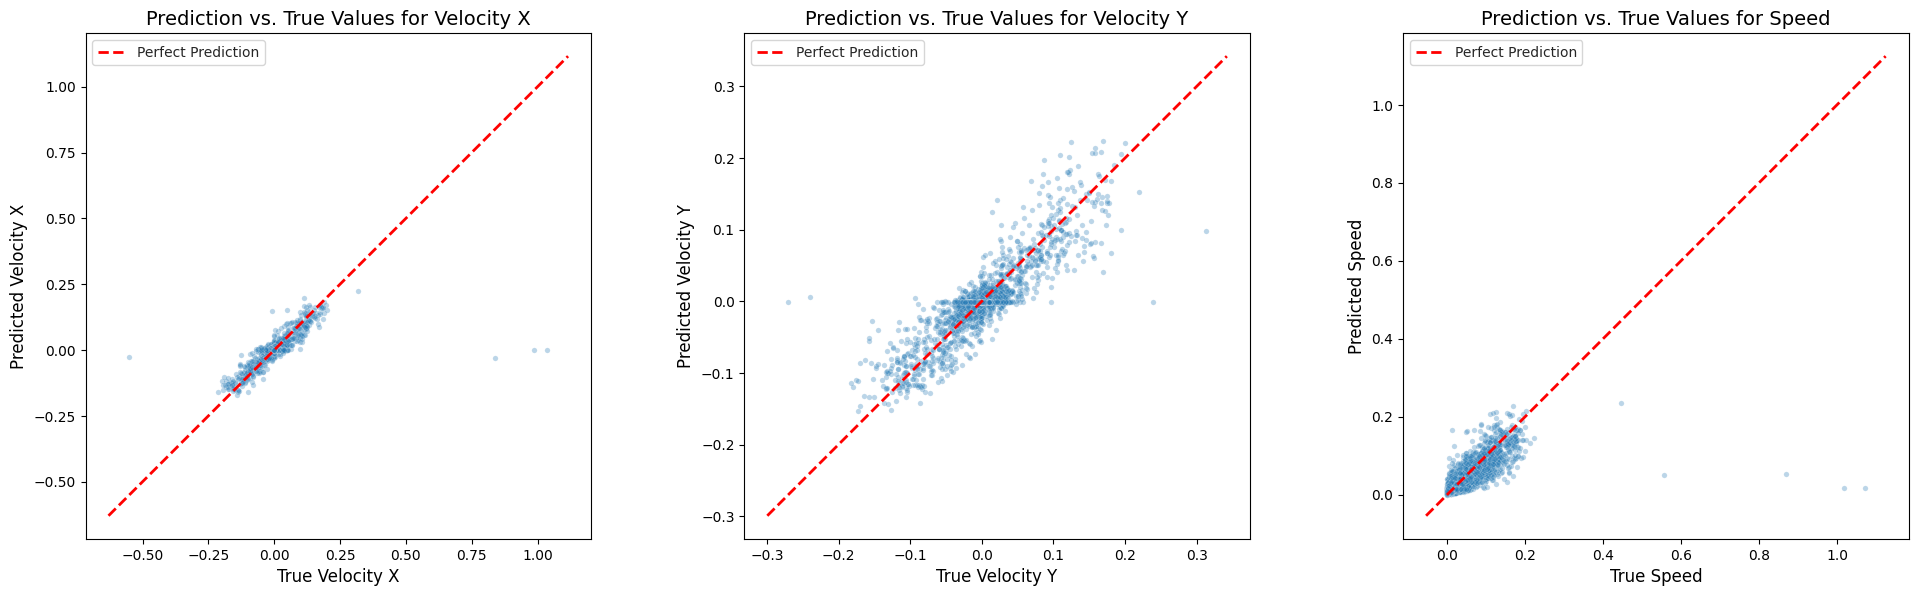

In [ ]:
# --- Evaluate the Model ---
print("\nEvaluating model on the test set...")
loss, mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Set Mean Squared Error: {loss:.4f}")
print(f"Test Set Mean Absolute Error: {mae:.4f}")

# --- Make Predictions ---
# Predict on scaled test data
predictions_scaled = model.predict(X_test_scaled)

# IMPORTANT: Inverse transform the predictions to get them back to their original scale
predictions = y_scaler.inverse_transform(predictions_scaled)

# Calculate R-squared score for each output
r2_vx = r2_score(y_test[:, 0], predictions[:, 0])
r2_vy = r2_score(y_test[:, 1], predictions[:, 1])
r2_speed = r2_score(y_test[:, 2], predictions[:, 2])

print(f"\nR-squared for velocity_x: {r2_vx:.3f}")
print(f"R-squared for velocity_y: {r2_vy:.3f}")
print(f"R-squared for speed: {r2_speed:.3f}")


# --- Visualize Predictions vs. True Values ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style("whitegrid")
target_labels = ['Velocity X', 'Velocity Y', 'Speed']

for i, ax in enumerate(axes):
    # Scatter plot of True vs. Predicted values
    sns.scatterplot(x=y_test[:, i], y=predictions[:, i], alpha=0.3, ax=ax, s=15)

    # Line for perfect prediction (y=x)
    lims = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(lims, lims, 'r--', linewidth=2, label='Perfect Prediction')

    ax.set_title(f'Prediction vs. True Values for {target_labels[i]}', fontsize=14)
    ax.set_xlabel(f'True {target_labels[i]}', fontsize=12)
    ax.set_ylabel(f'Predicted {target_labels[i]}', fontsize=12)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score

# NOTE: This cell assumes the previous cells for data preparation and model
# training have been run. We need the trained 'model' and the scalers.

# --- Define a Custom Scorer for Speed Prediction ---
# We need this because our model outputs three values (vx, vy, speed),
# but we only want to measure the importance for predicting 'speed'.

def speed_r2_scorer(model, X_scaled, y_true_scaled):
    """
    Calculates the R-squared score specifically for the 'speed' output.
    """
    # Get model predictions
    y_pred_scaled = model.predict(X_scaled)

    # Inverse transform to get back to original units
    y_pred = y_scaler.inverse_transform(y_pred_scaled)
    y_true = y_scaler.inverse_transform(y_true_scaled)

    # Extract the speed column (index 2)
    speed_true = y_true[:, 2]
    speed_pred = y_pred[:, 2]

    # Calculate and return the R-squared score
    return r2_score(speed_true, speed_pred)

Calculating importance using faster, robust gradient-based method...
Calculation complete.

--- Top 10 Most Important Neurons (Gradient Method) ---


,neuron_index,importance_mean
0,707,0.037458
1,299,0.027203
2,144,0.023788
3,592,0.022892
4,404,0.022380
5,610,0.021462
6,640,0.021449
7,160,0.020954
8,151,0.020789
9,276,0.020001


/tmp/ipython-input-8-3308034551.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-8-3308034551.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_neurons_grad['neuron_index'].astype(str))


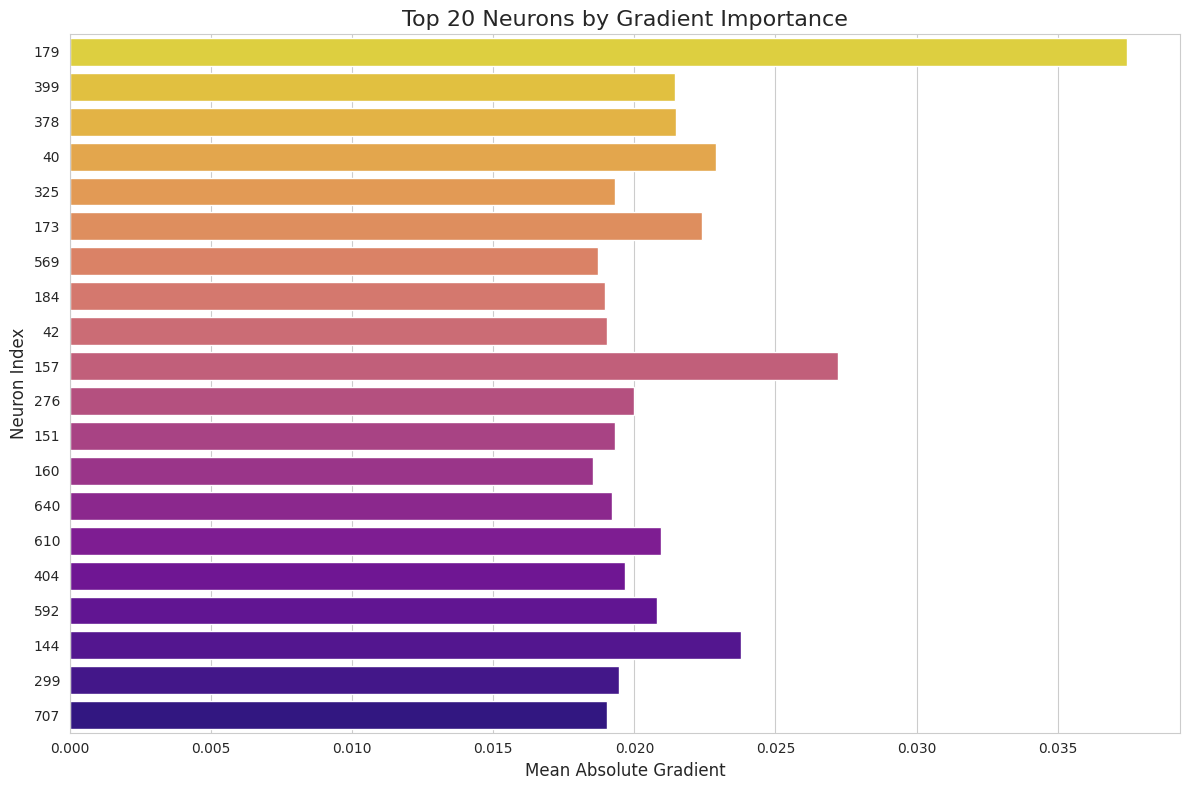

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print("Calculating importance using faster, robust gradient-based method...")

# Convert test data to a TensorFlow tensor
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)

# This block calculates the gradients
gradients = None
with tf.GradientTape() as tape:
    # **THE FIX**: Explicitly watch the input tensor. This is critical.
    tape.watch(X_test_tensor)

    # 1. Get model predictions
    predictions_scaled = model(X_test_tensor, training=False)
    # 2. Isolate the speed prediction (the 3rd column)
    speed_prediction_scaled = predictions_scaled[:, 2]
    # 3. Sum the speeds to get a single scalar value to differentiate
    target_scalar = tf.reduce_sum(speed_prediction_scaled)

# 4. Calculate the gradients of the target scalar with respect to the neuron inputs
gradients = tape.gradient(target_scalar, X_test_tensor)


# --- Check for success and process results ---
if gradients is None:
    print("\n\033[91mError: Gradient calculation failed and returned None.\033[0m")
    print("This usually means the GradientTape did not watch the input tensor correctly.")
    print("Please ensure the 'model' object is a standard Keras model and 'X_test_tensor' is a valid tensor.")
else:
    # The importance of each neuron is the average absolute gradient across all samples
    mean_abs_gradients = tf.reduce_mean(tf.abs(gradients), axis=0).numpy()

    # Create a DataFrame for the results
    gradient_importance = pd.DataFrame({
        'neuron_index': np.arange(X.shape[1]),
        'importance_mean': mean_abs_gradients
    }).sort_values('importance_mean', ascending=False).reset_index(drop=True)

    print("Calculation complete.")
    print("\n--- Top 10 Most Important Neurons (Gradient Method) ---")
    display(gradient_importance.head(10))

    # --- Plot the Results ---
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    top_n = 20
    top_neurons_grad = gradient_importance.head(top_n)

    ax = sns.barplot(
        x='importance_mean',
        y='neuron_index',
        data=top_neurons_grad,
        orient='h',
        palette='plasma'
    )
    ax.set_title(f'Top {top_n} Neurons by Gradient Importance', fontsize=16)
    ax.set_xlabel('Mean Absolute Gradient', fontsize=12)
    ax.set_ylabel('Neuron Index', fontsize=12)
    ax.set_yticklabels(top_neurons_grad['neuron_index'].astype(str))
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# --- Load and Prepare Data ---
input_file = '/content/drive/MyDrive/COSMOS_010perfect.npz'
data = np.load(input_file)

# 1. Prepare the features (X)
calcium_signal = data['calcium_signal']

# 2. Prepare the target (y)
timestamps = np.squeeze(data['timestamps'])
head_orientation = np.squeeze(data['head_orientation'])
delta_theta = np.diff(head_orientation)
delta_t = np.diff(timestamps)
delta_theta_corrected = (delta_theta + np.pi) % (2 * np.pi) - np.pi
angular_velocity = delta_theta_corrected / delta_t

# 3. Align the datasets (use N-1 samples for the calcium signal)
X = calcium_signal[:-1, :]
y = angular_velocity

print(f"Shape of Input Features (X): {X.shape}")
print(f"Shape of Target Variable (y): {y.shape}")

# --- Split and Scale Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# Scale target variable (reshaping is required for a 1D array)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

Shape of Input Features (X): (18000, 738)
Shape of Target Variable (y): (18000,)


In [ ]:
# --- Build the MLP Model for Regression ---
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2), # Helps prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1) # Single output neuron for angular velocity
])

# Compile the model with a loss function suitable for regression
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae']) # Mean Absolute Error

model.summary()

# --- Train the Model ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        94,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,913 (402.00 KB)

 Trainable params: 102,913 (402.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6524 - mae: 0.9010 - val_loss: 0.8454 - val_mae: 0.6238
Epoch 2/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9982 - mae: 0.6706 - val_loss: 0.7862 - val_mae: 0.6025
Epoch 3/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8492 - mae: 0.6315 - val_loss: 0.7364 - val_mae: 0.5835
Epoch 4/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7927 - mae: 0.6019 - val_loss: 0.7379 - val_mae: 0.5807
Epoch 5/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7918 - mae: 0.6009 - val_loss: 0.7165 - val_mae: 0.5757
Epoch 6/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7555 - mae: 0.5873 - val_loss: 0.6925 - val_mae: 0.5664
Epoch 7/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7597 - mae: 0.5822 - val_loss: 0.6849 - val_mae: 0.5625
Epoch 8/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7296 - mae: 0.5687 - val_loss: 0.6861 - val_mae: 0.5650
Epoch 9/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/


Evaluating model on the test set...
Test Set Mean Squared Error: 0.7478
Test Set Mean Absolute Error: 0.5605
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

R-squared (R²) Score: 0.270


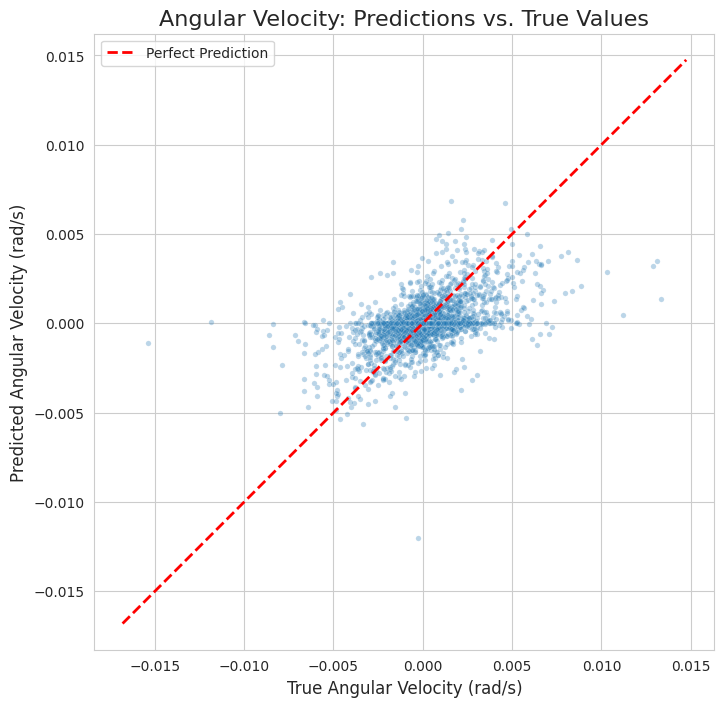

In [ ]:
# --- Evaluate the Model ---
print("\nEvaluating model on the test set...")
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Set Mean Squared Error: {test_loss:.4f}")
print(f"Test Set Mean Absolute Error: {test_mae:.4f}")

# --- Make and Inverse-Transform Predictions ---
predictions_scaled = model.predict(X_test_scaled)
predictions = y_scaler.inverse_transform(predictions_scaled).flatten() # Flatten back to 1D

# --- Calculate R-squared Score ---
# R-squared measures the proportion of variance in the target that can be
# predicted from the features. 1.0 is perfect, 0.0 is no better than guessing the mean.
r2 = r2_score(y_test, predictions)
print(f"\nR-squared (R²) Score: {r2:.3f}")

# --- Visualize Predictions vs. True Values ---
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")
sns.scatterplot(x=y_test, y=predictions, alpha=0.3, s=15)

# Add a line for perfect predictions
lims = [min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1])]
plt.plot(lims, lims, 'r--', linewidth=2, label='Perfect Prediction')

plt.title('Angular Velocity: Predictions vs. True Values', fontsize=16)
plt.xlabel('True Angular Velocity (rad/s)', fontsize=12)
plt.ylabel('Predicted Angular Velocity (rad/s)', fontsize=12)
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# --- Recreate the filtered data from the previous step ---
input_file = '/content/drive/MyDrive/COSMOS_010perfect.npz'
data = np.load(input_file)

timestamps = np.squeeze(data['timestamps'])
calcium_signal = data['calcium_signal']
head_orientation = np.squeeze(data['head_orientation'])

delta_time = np.diff(timestamps)
delta_theta = np.diff(head_orientation)
delta_theta_corrected = (delta_theta + np.pi) % (2 * np.pi) - np.pi
angular_velocity = delta_theta_corrected / delta_time

X = calcium_signal[:-1, :]
y = angular_velocity

angular_velocity_threshold = 0.002
is_turning = (y > angular_velocity_threshold) | (y < -angular_velocity_threshold)

X_turning = X[is_turning]
y_turning = y[is_turning]

print(f"Training on {len(y_turning)} data points after filtering.")

# --- Split and Scale the Filtered Data ---
X_train, X_test, y_train, y_test = train_test_split(X_turning, y_turning, test_size=0.2, random_state=42)

# Scale features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# Scale target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

Training on 3130 data points after filtering.


In [ ]:
# --- Build the MLP Model for Regression ---
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2), # Helps prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1) # Single output neuron for angular velocity
])

# Compile the model with a loss function suitable for regression
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae']) # Mean Absolute Error

model.summary()

# --- Train the Model ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │        94,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,913 (402.00 KB)

 Trainable params: 102,913 (402.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 2.1508 - mae: 1.1213 - val_loss: 0.8687 - val_mae: 0.7654
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1731 - mae: 0.7726 - val_loss: 0.7474 - val_mae: 0.7133
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8084 - mae: 0.6954 - val_loss: 0.7423 - val_mae: 0.7036
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7894 - mae: 0.6598 - val_loss: 0.7073 - val_mae: 0.6725
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6891 - mae: 0.6211 - val_loss: 0.6585 - val_mae: 0.6606
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5758 - mae: 0.5889 - val_loss: 0.6069 - val_mae: 0.6369
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6762 - mae: 0.5945 - val_loss: 0.6423 - val_mae: 0.6420
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8689 - mae: 0.5661 - val_loss: 0.6128 - val_mae: 0.6291
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.49


Evaluating model on the filtered test set...
Test Set Mean Squared Error: 0.5260
Test Set Mean Absolute Error: 0.5527
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

R-squared (R²) Score: 0.493


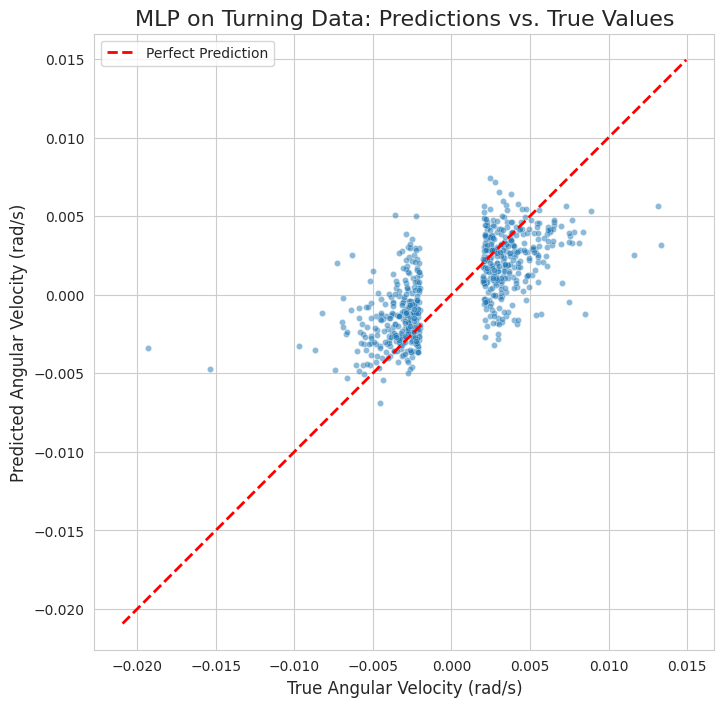

In [ ]:
# --- Evaluate the Model on Filtered Test Data ---
print("\nEvaluating model on the filtered test set...")
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Set Mean Squared Error: {test_loss:.4f}")
print(f"Test Set Mean Absolute Error: {test_mae:.4f}")

# --- Make and Inverse-Transform Predictions ---
predictions_scaled = model.predict(X_test_scaled)
predictions = y_scaler.inverse_transform(predictions_scaled).flatten()

# --- Calculate R-squared Score ---
r2 = r2_score(y_test, predictions)
print(f"\nR-squared (R²) Score: {r2:.3f}")

# --- Visualize Predictions vs. True Values ---
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")
sns.scatterplot(x=y_test, y=predictions, alpha=0.5, s=20)

lims = [min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1])]
plt.plot(lims, lims, 'r--', linewidth=2, label='Perfect Prediction')

plt.title('MLP on Turning Data: Predictions vs. True Values', fontsize=16)
plt.xlabel('True Angular Velocity (rad/s)', fontsize=12)
plt.ylabel('Predicted Angular Velocity (rad/s)', fontsize=12)
plt.legend()
plt.axis('equal')
plt.show()